In [ ]:
import pandas as pd
import joblib
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from add_preprocessing import load_and_prepare_data, create_preprocessor

# Load and prepare data
X, y = load_and_prepare_data("../Motor_vehicle_insurance_data.csv")
preprocessor = create_preprocessor(X)

# Model pipeline with Linear Regression
model = Pipeline([
    ('preprocessor', preprocessor),
    ('regressor', LinearRegression())
])

# Train-test split & model training
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model.fit(X_train, y_train)

# Predict and convert to classes
y_pred_continuous = model.predict(X_test)
y_pred_binary = (y_pred_continuous >= 0.5).astype(int)

# Export model to models folder
joblib.dump(model, "../models/linear_regression_model.pkl")
print("Linear Regression model saved as '../models/linear_regression_model.pkl'")

c:\Users\garre\OneDrive\Desktop\CSE 2600\Final Project\cse2600-main\cse2600-main\model_codes\add_preprocessing.py:14: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath, delimiter=delimiter)


✅ Linear Regression model saved as '../models/linear_regression_model.pkl'


c:\Users\garre\OneDrive\Desktop\CSE 2600\Final Project\cse2600-main\cse2600-main\model_codes\add_preprocessing.py:14: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(filepath, delimiter=delimiter)


✅ Linear Regression Model Evaluation
------------------------------
Accuracy: 0.7938515465870873
ROC AUC Score: 0.7090985430563304

Classification Report:
               precision    recall  f1-score   support

           0       0.51      0.05      0.09      4361
           1       0.80      0.99      0.88     16750

    accuracy                           0.79     21111
   macro avg       0.66      0.52      0.49     21111
weighted avg       0.74      0.79      0.72     21111



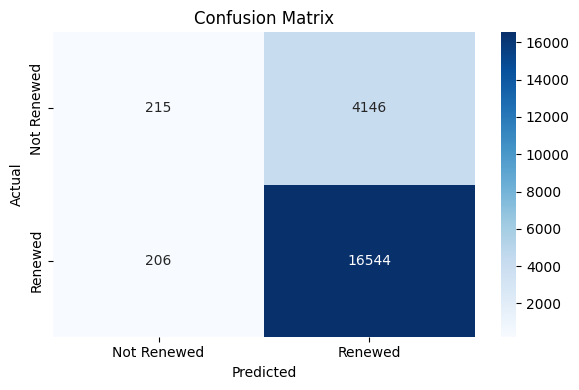

In [ ]:
import joblib
import pandas as pd
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix,
    roc_auc_score
)
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

    # === LOAD RAW TEST DATA ===
# IMPORTANT: we must load raw features, not already preprocessed data
from add_preprocessing import load_and_prepare_data

# Load full dataset (same as training)
X_full, y_full = load_and_prepare_data("../Motor_vehicle_insurance_data.csv")

# Train-test split again with SAME random_state
from sklearn.model_selection import train_test_split
X_train_raw, X_test_raw, y_train, y_test = train_test_split(X_full, y_full, test_size=0.2, random_state=42)

# Load the trained model
model = joblib.load("../models/linear_regression_model.pkl")

# Predict on raw test set
y_pred_scores = model.predict(X_test_raw)               # Continuous scores
y_pred = (y_pred_scores >= 0.5).astype(int)              # Convert to 0 or 1
y_prob = y_pred_scores                                  # Use scores for ROC AUC

# Evaluate model performance
print("Linear Regression Model Evaluation")
print("-" * 30)
print("Accuracy:", accuracy_score(y_test, y_pred))
print("ROC AUC Score:", roc_auc_score(y_test, y_prob))
print("\nClassification Report:\n", classification_report(y_test, y_pred))

# Display confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap="Blues",
            xticklabels=['Not Renewed', 'Renewed'],
            yticklabels=['Not Renewed', 'Renewed'])
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.tight_layout()
plt.show()

In [ ]:
# Training and test accuracy
y_train_pred = model.predict(X_train)

y_train_pred_binary = (y_train_pred >= 0.5).astype(int)
train_accuracy = accuracy_score(y_train, y_train_pred_binary)

# Test accuracy
test_accuracy = accuracy_score(y_test, y_pred)

print("Training Accuracy:", train_accuracy)
print("Test Accuracy:", test_accuracy)

# Bias-variance analysis
if train_accuracy < 0.8 and test_accuracy < 0.8:
    print("The model may have high bias (underfitting).")
elif train_accuracy > 0.95 and test_accuracy < 0.8:
    print("The model may have high variance (overfitting).")
else:
    print("The model has a good balance between bias and variance.")

Training Accuracy: 0.7996542087063616
Test Accuracy: 0.7938515465870873
The model may have high bias (underfitting).


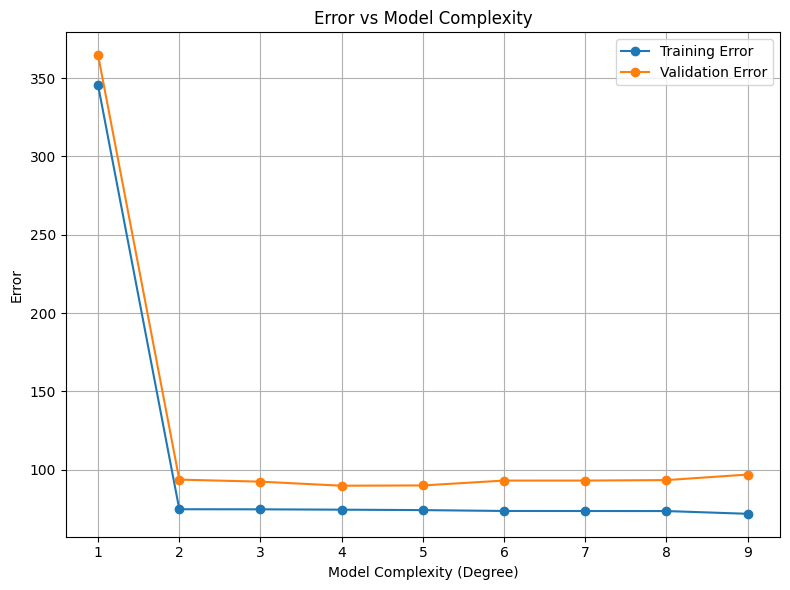

In [23]:
# Plot error vs complexity
plt.figure(figsize=(8, 6))
plt.plot(model_complexity, train_errors, label='Training Error', marker='o')
plt.plot(model_complexity, val_errors, label='Validation Error', marker='o')
plt.xlabel('Model Complexity (Degree)')
plt.ylabel('Error')
plt.title('Error vs Model Complexity')
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()

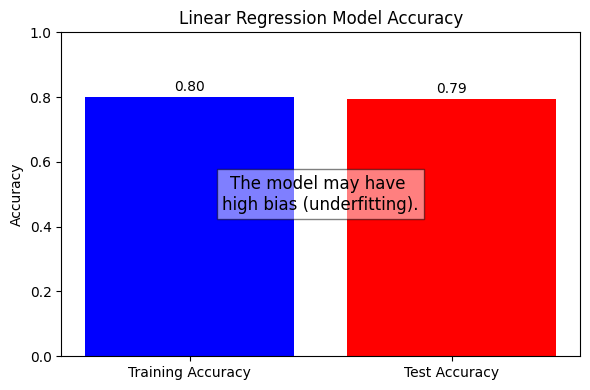

In [ ]:
# Plot Training and Test Accuracy
plt.figure(figsize=(6, 4))
accuracy_values = [train_accuracy, test_accuracy]
accuracy_labels = ['Training Accuracy', 'Test Accuracy']

plt.bar(accuracy_labels, accuracy_values, color=['blue', 'red'])
plt.ylim(0, 1)  # Set y-axis range to 0-1 for better visualization
plt.title('Linear Regression Model Accuracy')
plt.ylabel('Accuracy')
plt.text(0, train_accuracy + 0.02, f"{train_accuracy:.2f}", ha='center')
plt.text(1, test_accuracy + 0.02, f"{test_accuracy:.2f}", ha='center')

# Add a note about bias
plt.text(0.5, 0.5, "The model may have \nhigh bias (underfitting).",
         fontsize=12, color='black', ha='center', va='center', bbox=dict(facecolor='white', alpha=0.5))
##plt.figtext(0.5, -0.1, "The model may have high bias (underfitting).", wrap=True, horizontalalignment='center', fontsize=10)

plt.tight_layout()
plt.show()